# Citibike data

Citibike makes the data available as a csv file for each month. Here we will use data from July through December 2013. 

(To reproduce the analysis **you can skip this following section** and start with the pickled pandas dataFrame in the next section).

______________________________________________________________________________________________________________________

## Prepare dataFrame


Download required files from Citibike's website [here](http://www.citibikenyc.com/system-data) and read data.

In [43]:
import pandas as pd
import datetime as dt

In [43]:
jul = pd.read_csv('Data/2013-07-CitiBiketripdata.csv')
aug = pd.read_csv('Data/2013-08-CitiBiketripdata.csv')
sep = pd.read_csv('Data/2013-09-CitiBiketripdata.csv')
oct = pd.read_csv('Data/2013-10-CitiBiketripdata.csv')
nov = pd.read_csv('Data/2013-11-CitiBiketripdata.csv')
dec = pd.read_csv('Data/2013-12-CitiBiketripdata.csv')

Combine data from all months to create a single dataFrame.

In [44]:
data = [jul, aug, sep, oct, nov, dec]
df = pd.concat(data)

In [45]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1


Convert starttime and stoptime to "datetime" data type and index dataFrame by starttime.

In [47]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
df.index = pd.to_datetime(df['starttime'])

In [48]:
df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

Create columns for month, day, and hour (according to trip start time).

In [26]:
df['month'] = df['starttime'].dt.month
df['day_of_month'] = df['starttime'].dt.day
df['day_of_week'] = df['starttime'].dt.dayofweek
df['hour'] = df['starttime'].dt.hour

Put new columns at the beginning.

In [29]:
# list(df.columns.values)
df = df[['month', 'day_of_month', 'day_of_week', 'hour', 'tripduration', 'starttime', 'stoptime',
         'start station id', 'start station name', 'start station latitude',
         'start station longitude', 'end station id', 'end station name', 'end station latitude',
         'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender']]

**Pickle final dataFrame.**

In [31]:
file_name = 'citibike_July-Aug2013.pkl'
df.to_pickle(file_name)

## Brief exploratory analysis


In [2]:
import pandas as pd
import numpy as np
from datetime import time
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

Load pickled dataFrame (pkl can be downloaded from [here](https://www.dropbox.com/s/m92e69sfleex0zj/citibike_July-Aug2013.pkl?dl=0)).

(Skip this if you loaded data in previous section)

In [32]:
file_name = 'citibike_July-Aug2013.pkl'
%time df = pd.read_pickle(file_name)

CPU times: user 11 s, sys: 1.38 s, total: 12.4 s
Wall time: 18.3 s


In [33]:
df.shape

(5037185, 19)

In [34]:
df.dtypes

month                               int64
day_of_month                        int64
day_of_week                         int64
hour                                int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

In [35]:
df.head()

,month,day_of_month,day_of_week,hour,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,7,1,0,0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
2013-07-01 00:00:02,7,1,0,0,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2013-07-01 00:01:04,7,1,0,0,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
2013-07-01 00:01:06,7,1,0,0,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
2013-07-01 00:01:10,7,1,0,0,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1


How many citibike stations are there:

In [6]:
df['start station id'].unique().shape

(330,)

And how many different bikes:

In [7]:
df['bikeid'].unique().shape

(6503,)

In [8]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000
mean,887.638411,439.431707,40.734333,-73.991048,439.742451,40.734023,-73.991151,17650.751773,1.072951
std,3826.185719,343.173266,0.019921,0.012426,348.042293,0.019944,0.012520,1731.694085,0.576649
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,405.000000,304.000000,40.720434,-74.000165,303.000000,40.720196,-74.000271,16155.000000,1.000000
50%,648.000000,402.000000,40.736197,-73.990765,402.000000,40.735439,-73.990931,17653.000000,1.000000
75%,1067.000000,485.000000,40.750200,-73.981948,484.000000,40.749718,-73.981948,19128.000000,1.000000
max,6250750.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21333.000000,2.000000


Median trip duration is (suprisingly) short:

In [36]:
df.tripduration.median()/60 # In minutes

10.8

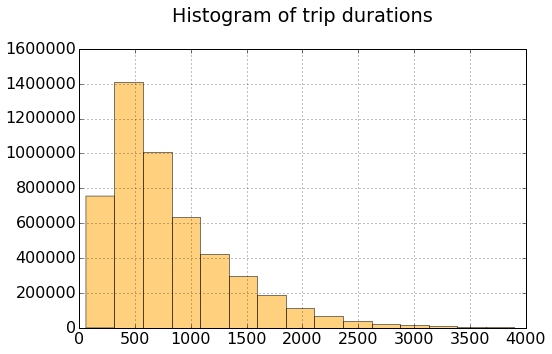

In [39]:
plt.rcParams.update({'font.size': 16})
df[(df['tripduration']/60 < 65)][['tripduration']].hist(figsize=(8,5),
                                                        bins=15, alpha=0.5, color='orange')
plt.title('Histogram of trip durations\n')

### Distribution of number of trips

#### Daily variation

Resample data daily over the whole time series and plot data
(using pandas' timestamp-specific method "resample")

In [40]:
countsPerDay = df.starttime.resample('D', how=['count'])

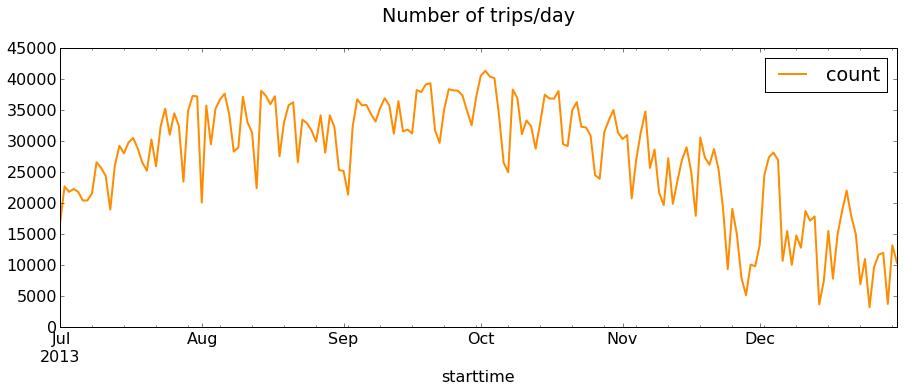

In [41]:
countsPerDay.plot(figsize=(15,5), color='DarkOrange', linewidth=2)
plt.title('Number of trips/day\n')

#### Hourly variation: July 1st and July 4th

Resample data hourly for the two dates.

In [42]:
july1Hourly = df['2013-7-1'].starttime.resample('H', how=['count'])
july4Hourly = df['2013-7-4'].starttime.resample('H', how=['count'])

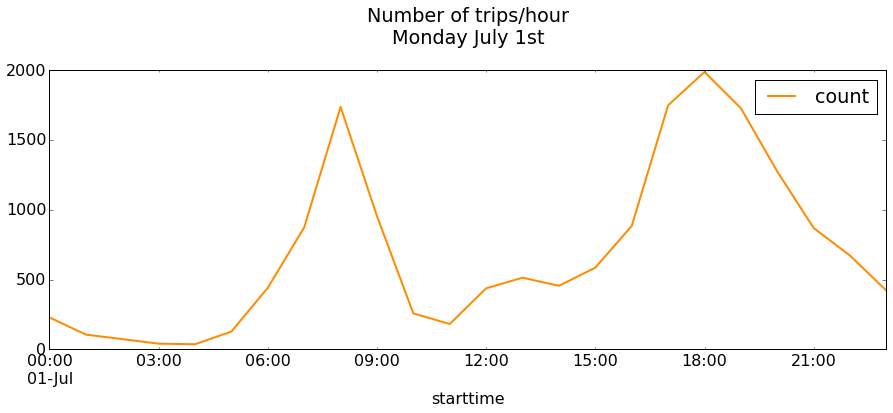

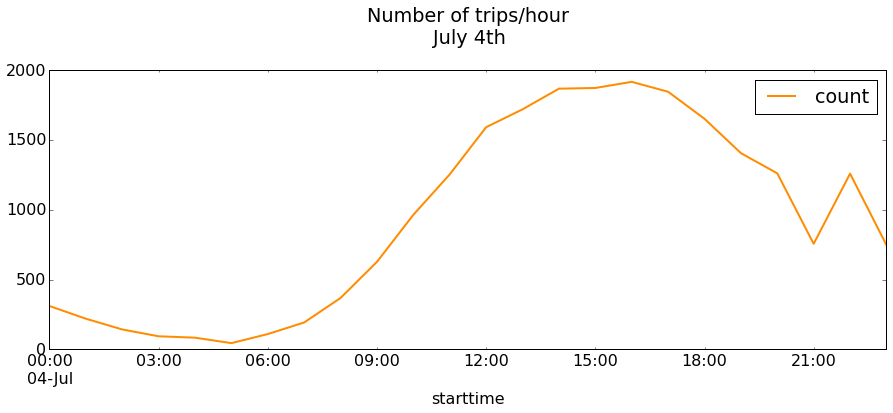

In [73]:
july1Hourly.plot(figsize=(15,5), color='DarkOrange', linewidth=2)
plt.title('Number of trips/hour\nMonday July 1st\n')

july4Hourly.plot(figsize=(15,5), color='DarkOrange', linewidth=2)
plt.title('Number of trips/hour\nJuly 4th\n')

Not surprisingly, the commutter pattern of citibike use disappears in the holiday.

#### Number of trips per station

Get only start station id, name and coordinates. Then drop duplicates.

In [74]:
dfStartStation= df.iloc[:,[7,8,9,10]]
dfStartStation.index = dfStartStation['start station id']

In [75]:
dfStartStation.head()

,start station id,start station name,start station latitude,start station longitude
start station id,,,,
164,164,E 47 St & 2 Ave,40.753231,-73.970325
388,388,W 26 St & 10 Ave,40.749718,-74.002950
293,293,Lafayette St & E 8 St,40.730287,-73.990765
531,531,Forsyth St & Broome St,40.718939,-73.992663
382,382,University Pl & E 14 St,40.734927,-73.992005


In [76]:
dfStartStation = dfStartStation.drop_duplicates()
dfStartStation.shape

(330, 4)

Calculate total counts per individual station and add to new dataFrame.

In [77]:
countStartStation = df.groupby('start station id')['start station id'].count()
dfStartStation['count'] = countStartStation
dfStartStation.head()

,start station id,start station name,start station latitude,start station longitude,count
start station id,,,,,
164,164,E 47 St & 2 Ave,40.753231,-73.970325,14019
388,388,W 26 St & 10 Ave,40.749718,-74.002950,22391
293,293,Lafayette St & E 8 St,40.730287,-73.990765,46734
531,531,Forsyth St & Broome St,40.718939,-73.992663,17574
382,382,University Pl & E 14 St,40.734927,-73.992005,36571


## Mapping station use

Since my experience with [Vincent](http://vincent.readthedocs.org/en/latest/) was not very good, I followed Enrico's notes and used [Folium](http://folium.readthedocs.org/en/latest/) as well.

(Do not forget to add "http:" to the links in the html file header)

#### Circle size reflecting relative use of stations as trip starting points over the whole six month period

In [212]:
import folium

citibike_starstation_6months = folium.Map(location=[40.74, -73.99], width=750, height = 750,
                                          tiles = 'Stamen Toner', zoom_start=12)

for index, row in dfStartStation.iterrows():
    citibike_starstation_6months.circle_marker(location=[row['start station latitude'],
                                                         row['start station longitude']],
                                               popup=row['start station name'],
                                               radius=row['count']/250,
                                               fill_color='#FFC266', line_color='#FF9900')
    
citibike_starstation_6months.create_map(path='citibike_starstation_6months.html')

#del citibike_starstation_6months


In [151]:
from IPython.display import IFrame
IFrame('citibike_starstation_6months.html', width=750, height=750)

#### Plot lines between start and end station

In [119]:
july1_lines = df.ix['2013-7-1 09:30'] # Get subset of data
july1_lines.shape

(13, 19)

In [149]:
import folium

citibike_trips_july1_lines = folium.Map(location=[40.74, -73.99], width=750, height = 750,
                                     tiles = 'Stamen Toner', zoom_start=12)

for index, row in july1_lines.iterrows():
    citibike_trips_july1_lines.line(locations=[[row['start station latitude'],
                                          row['start station longitude']],
                                         [row['end station latitude'],
                                          row['end station longitude']]],
                                    line_color='#FFC266', line_opacity=0.8, line_weight=2)

citibike_trips_july1_8am.create_map(path='citibike_trips_july1_lines.html')

In [150]:
from IPython.display import IFrame
IFrame('citibike_trips_july1_lines.html', width=750, height=750)